<a href="https://colab.research.google.com/github/excrement1/2021dataset/blob/master/2021_pandas_%EB%B3%91%EC%95%84%EB%A6%AC%EB%B0%982_OpenAPI%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC_%EC%BD%94%EB%A1%9C%EB%82%9819_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치하기
!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 폰트 세팅
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

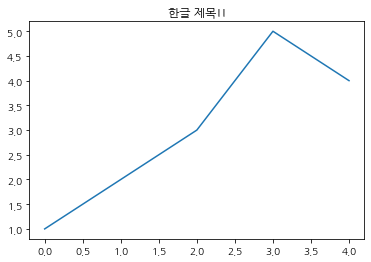

In [ ]:
# 위 코드 실행 후 [메뉴] - [런타임] - [런타임 다시 시작] - [예]
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 
plt.title('한글 제목!!')
plt.plot([1,2,3,5,4])
plt.show()

### 오픈 API : 인터넷에서 데이터 입력하는 방법!

https://data.seoul.go.kr/index.do

In [ ]:
import requests
import pandas as pd

In [ ]:
api_key = '61444e4a736578633131324547635347'
url = 'http://openapi.seoul.go.kr:8088/'+api_key+'/json/Corona19Status/1/5/'

In [ ]:
re = requests.get(url)
re

<Response [200]>

In [ ]:
result = re.json()
result

{'Corona19Status': {'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'list_total_count': 37126,
  'row': [{'CORONA19_AREA': '중랑구',
    'CORONA19_CONTACT_HISTORY': '감염경로 조사중',
    'CORONA19_CORRECTIVE': '',
    'CORONA19_COUNTRY': '',
    'CORONA19_DATE': '2021-04-26',
    'CORONA19_ID': '37126',
    'CORONA19_IDATE': '2021-04-27 11:24:39',
    'CORONA19_LEAVE_STATUS': '',
    'CORONA19_MDATE': '2021-04-27 11:24:39',
    'CORONA19_MOVING_PATH': '',
    'CORONA19_NO': '',
    'CORONA19_PERSONAL': '',
    'CORONA19_TRAVEL_HISTORY': ''},
   {'CORONA19_AREA': '강동구',
    'CORONA19_CONTACT_HISTORY': '감염경로 조사중',
    'CORONA19_CORRECTIVE': '',
    'CORONA19_COUNTRY': '',
    'CORONA19_DATE': '2021-04-26',
    'CORONA19_ID': '37125',
    'CORONA19_IDATE': '2021-04-27 11:24:39',
    'CORONA19_LEAVE_STATUS': '',
    'CORONA19_MDATE': '2021-04-27 11:24:39',
    'CORONA19_MOVING_PATH': '',
    'CORONA19_NO': '',
    'CORONA19_PERSONAL': '',
    'CORONA19_TRAVEL_HISTORY': ''},
   {'CORONA19

In [ ]:
result['Corona19Status']

{'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
 'list_total_count': 37126,
 'row': [{'CORONA19_AREA': '중랑구',
   'CORONA19_CONTACT_HISTORY': '감염경로 조사중',
   'CORONA19_CORRECTIVE': '',
   'CORONA19_COUNTRY': '',
   'CORONA19_DATE': '2021-04-26',
   'CORONA19_ID': '37126',
   'CORONA19_IDATE': '2021-04-27 11:24:39',
   'CORONA19_LEAVE_STATUS': '',
   'CORONA19_MDATE': '2021-04-27 11:24:39',
   'CORONA19_MOVING_PATH': '',
   'CORONA19_NO': '',
   'CORONA19_PERSONAL': '',
   'CORONA19_TRAVEL_HISTORY': ''},
  {'CORONA19_AREA': '강동구',
   'CORONA19_CONTACT_HISTORY': '감염경로 조사중',
   'CORONA19_CORRECTIVE': '',
   'CORONA19_COUNTRY': '',
   'CORONA19_DATE': '2021-04-26',
   'CORONA19_ID': '37125',
   'CORONA19_IDATE': '2021-04-27 11:24:39',
   'CORONA19_LEAVE_STATUS': '',
   'CORONA19_MDATE': '2021-04-27 11:24:39',
   'CORONA19_MOVING_PATH': '',
   'CORONA19_NO': '',
   'CORONA19_PERSONAL': '',
   'CORONA19_TRAVEL_HISTORY': ''},
  {'CORONA19_AREA': '강동구',
   'CORONA19_CONTACT_HISTORY': '

In [ ]:
result['Corona19Status']['list_total_count']

37126

In [ ]:
total_num = result['Corona19Status']['list_total_count']

In [ ]:
ids = []
corona_dates = []
address = []
corona_contact_detail = []
status = []

for i in range(total_num // 1000 + 1) :
  end = (i+1) * 1000
  start = (1000  * i) + 1

  if end > total_num : 
    end = total_num

  url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/Corona19Status/{start}/{end}/'
  re = requests.get(url)
  result = re.json()

  for row in result['Corona19Status']['row'] : 
    ids.append(row['CORONA19_ID'])
    corona_dates.append(row['CORONA19_DATE'])
    address.append(row['CORONA19_AREA'])
    corona_contact_detail.append(row['CORONA19_CONTACT_HISTORY'])
    status.append(row['CORONA19_LEAVE_STATUS'])

df = pd.DataFrame([ids,corona_dates, address, corona_contact_detail, status])

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,37086,37087,37088,37089,37090,37091,37092,37093,37094,37095,37096,37097,37098,37099,37100,37101,37102,37103,37104,37105,37106,37107,37108,37109,37110,37111,37112,37113,37114,37115,37116,37117,37118,37119,37120,37121,37122,37123,37124,37125
0,37126,37125,37124,37123,37122,37121,37120,37119,37118,37117,37116,37115,37114,37113,37112,37111,37110,37109,37108,37107,37106,37105,37104,37103,37102,37101,37100,37099,37098,37097,37096,37095,37094,37093,37092,37091,37090,37089,37088,37087,...,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1
1,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,2021-04-26,...,2020-02-25,2020-02-25,2020-02-25,2020-02-25,2020-02-24,2020-02-24,2020-02-25,2020-02-24,2020-02-24,2020-02-22,2020-02-22,2020-02-23,2020-02-23,2020-02-23,2020-02-22,2020-02-22,2020-02-22,2020-02-21,2020-02-21,2020-02-20,2020-02-20,2020-02-20,2020-02-20,2020-02-20,2020-02-19,2020-02-19,2020-02-16,2020-02-16,2020-02-06,2020-02-06,2020-02-05,2020-02-05,2020-02-02,2020-01-31,2020-01-31,2020-01-31,2020-01-30,2020-01-30,2020-01-30,2020-01-24
2,중랑구,강동구,강동구,강동구,강동구,강동구,강동구,강동구,강동구,강동구,양천구,광진구,영등포구,은평구,타시도,강서구,은평구,은평구,은평구,관악구,강동구,성북구,광진구,은평구,동대문구,동대문구,용산구,타시도,송파구,강동구,도봉구,동대문구,동대문구,중랑구,용산구,강동구,서초구,영등포구,도봉구,구로구,...,강동구,금천구,타시도,관악구,송파구,은평구,타시도,송파구,송파구,서초구,송파구,강동구,종로구,강서구,서초구,강동구,구로구,서초구,서대문구,종로구,성동구,종로구,타시도,종로구,종로구,성동구,종로구,종로구,타시도,서대문구,성북구,송파구,타시도,종로구,종로구,성북구,마포구,종로구,중랑구,강서구
3,감염경로 조사중,감염경로 조사중,감염경로 조사중,타시도 확진자 접촉,감염경로 조사중,감염경로 조사중,감염경로 조사중,서울시 소재 직장 관련,서울시 소재 직장 관련,서울시 소재 직장 관련,감염경로 조사중,광진구 소재 실내체육시설 관련,기타 확진자 접촉,감염경로 조사중,감염경로 조사중,감염경로 조사중,은평구 소재 종교시설(\'21년 4월(2)),감염경로 조사중,감염경로 조사중,기타 확진자 접촉,타시도 확진자 접촉,기타 확진자 접촉,기타 확진자 접촉,기타 확진자 접촉,기타 확진자 접촉,기타 확진자 접촉,감염경로 조사중,은평구 소재 종교시설(\'21년 4월(2)),병원 및 요양시설,감염경로 조사중,감염경로 조사중,기타 확진자 접촉,감염경로 조사중,기타 확진자 접촉,감염경로 조사중,감염경로 조사중,감염경로 조사중,동작구 소재 직장관련(\'21.4.),감염경로 조사중,서울시 소재 댄스연습실 관련,...,명성교회,해외유입,기타 확진자 접촉,기타 확진자 접촉,타시도 확진자 접촉,은평성모병원,기타 확진자 접촉,타시도 확진자 접촉,타시도 확진자 접촉,타시도 확진자 접촉,타시도 확진자 접촉,은평성모병원,은평성모병원,해외유입,타시도 확진자 접촉,은평성모병원,타시도 확진자 접촉,타시도 확진자 접촉,은평성모병원,종로구 집단발병,성동구 아파트 관리사무소,종로구 집단발병,타시도 확진자 접촉,종로구 집단발병,종로구 집단발병,성동구 아파트 관리사무소,종로구 집단발병,종로구 집단발병,해외유입,해외유입,종로구 집단발병,해외유입,해외유입,종로구 집단발병,종로구 집단발병,기타 확진자 접촉,해외유입,종로구 집단발병,해외유입,해외유입
4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,사망,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원


In [ ]:
df = pd.DataFrame([ids,corona_dates, address, corona_contact_detail, status]).T
df.columns = ['NO','확진일','지역','접촉력','현재상태']

In [ ]:
df.head()

,NO,확진일,지역,접촉력,현재상태
0,37126,2021-04-26,중랑구,감염경로 조사중,
1,37125,2021-04-26,강동구,감염경로 조사중,
2,37124,2021-04-26,강동구,감염경로 조사중,
3,37123,2021-04-26,강동구,타시도 확진자 접촉,
4,37122,2021-04-26,강동구,감염경로 조사중,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37126 entries, 0 to 37125
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      37126 non-null  object
 1   확진일     37126 non-null  object
 2   지역      37126 non-null  object
 3   접촉력     37126 non-null  object
 4   현재상태    37126 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [ ]:
# 데이터 통계 정보 확인
df.describe()

,NO,확진일,지역,접촉력,현재상태
count,37126,37126,37126,37126,37126
unique,37126,427,35,660,3
top,30188,2020-12-17,송파구,기타 확진자 접촉,퇴원
freq,1,588,2100,12046,34005


In [ ]:
# 확진일 열만 확인
df['확진일']

0        2021-04-26
1        2021-04-26
2        2021-04-26
3        2021-04-26
4        2021-04-26
            ...    
37121    2020-01-31
37122    2020-01-30
37123    2020-01-30
37124    2020-01-30
37125    2020-01-24
Name: 확진일, Length: 37126, dtype: object

In [ ]:
# 확진일 열 카운팅
df['확진일'].value_counts()

2020-12-17    588
2020-12-24    568
2020-12-28    523
2020-12-25    430
2020-12-16    427
             ... 
2020-04-19      1
2020-03-05      1
2020-04-15      1
2020-05-17      1
2020-04-18      1
Name: 확진일, Length: 427, dtype: int64

In [ ]:
# 확진일 열 일자별 카운팅1
df['확진일'].value_counts().sort_index()

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-04-22    204
2021-04-23    253
2021-04-24    175
2021-04-25    154
2021-04-26    116
Name: 확진일, Length: 427, dtype: int64

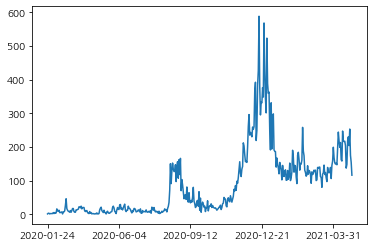

In [ ]:
# 확진일 일자별 카운팅 시각화
df['확진일'].value_counts().sort_index().plot()

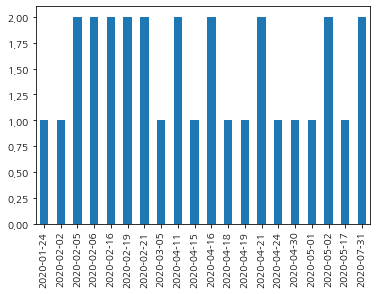

In [ ]:
# 확진일 일자별 카운팅 시각화
df['확진일'].value_counts()[-20:].sort_index().plot.bar()

In [ ]:
# 접촉력 카운팅
df['접촉력'].value_counts()

기타 확진자 접촉         12046
감염경로 조사중           8896
타시도 확진자 접촉         1757
동부구치소 관련           1175
해외유입               1056
                  ...  
수도권산악회(11월) 관련        1
이에스에스콤글로벌             1
영등포 소재 의료기관 관련        1
강남구 오렌지라이프 관련         1
용산구 음식점 관련            1
Name: 접촉력, Length: 660, dtype: int64

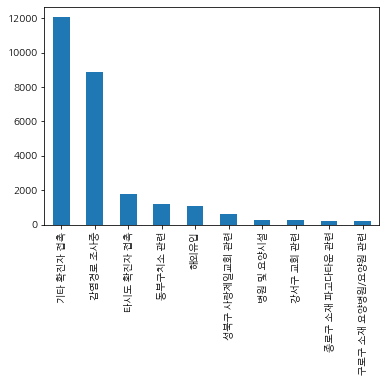

In [ ]:
# 접촉력 Top 10 시각화
df['접촉력'].value_counts()[:10].plot.bar()

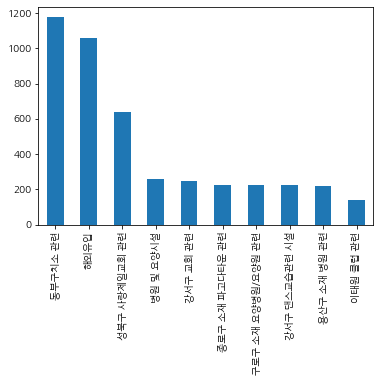

In [ ]:
# 접촉력 Top 10 시각화
df['접촉력'].value_counts()[3:13].plot.bar()

In [ ]:
# 확진 자치구 Top 10 시각화
df['지역'].value_counts()[:10].plot.bar()

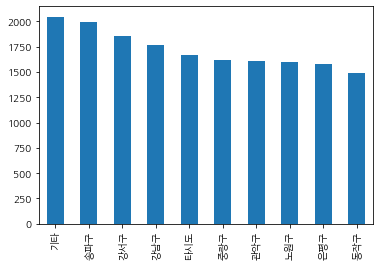

In [ ]:
# 2020년 8월 13일부터 확진 자치구 Top 10 시각화
df[df['확진일']>='2020-08-13']['지역'].value_counts()[:10].plot.bar()

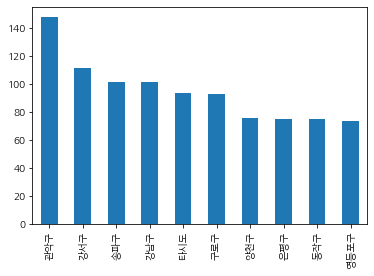

In [ ]:
# 2020년 8월 13일 이전 확진 자치구 Top 10 시각화
df[df['확진일']<'2020-08-13']['지역'].value_counts()[:10].plot.bar()

In [ ]:
df[(df['확진일']<'2021-03-31') | (df['확진일'] > '2020-07-31')]['지역'].value_counts()[:10]

송파구    2100
기타     2066
강서구    1972
강남구    1866
타시도    1761
관악구    1757
중랑구    1657
은평구    1654
노원구    1648
동작구    1567
Name: 지역, dtype: int64

In [ ]:
a = df[(df['확진일']<'2021-03-31') | (df['확진일'] > '2020-07-31')]['지역'].value_counts()[:10] / [673000,1000000,585000,544000,1000000,509000,399000,484000,527000,401000]

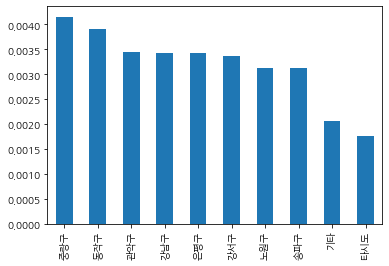

In [ ]:
a.sort_values(ascending = False).plot.bar()